In [1]:
from src.FunctionsProperties import *
import matplotlib.pyplot as plt

## Create all_files

In [3]:
# Create folders to Results
make_results_folders()
move_to_data()

In [2]:
# ==> READ DOCUMENTATION OF FUNCTION all_properties_file(N,dim, alpha_a, alpha_g) BEFORE RUN THAT CELL!! <==
N = [5000, 10000, 20000, 40000, 80000, 100000, 160000, 320000, 640000]
#N = [5000]
dim = [1, 2, 3, 4]

for n in N:
    for d in dim:
        all_combinations_ag =  extract_alpha_values(n, d)
        for i in range(len(all_combinations_ag)):
            try:
                # READ DOCUMENTATION BEFORE RUN THAT CELL
                all_properties_file(n, d, all_combinations_ag[i][0], all_combinations_ag[i][1])
                fixing_data(n, d, all_combinations_ag[i][0], all_combinations_ag[i][1])
            except FileNotFoundError:
                pass
            #remove_cod_file_column(n, d, all_combinations_ag[i][0], all_combinations_ag[i][1])
clear_output()

In [3]:
N = [5000, 10000, 20000, 40000, 80000, 100000 ,160000, 320000]
dim = [1, 2, 3, 4]
format_file(N, dim)
all_data(N, dim)

5000 1 0.0 5.0
5000 1 7.0 8.0
5000 1 2.0 11.0
5000 1 1.0 0.1
5000 1 21.0 2.0
5000 1 1.0 5.0
5000 1 2.0 10.0
5000 1 8.0 1.0
5000 1 6.0 4.0
5000 1 5.0 3.0
5000 1 32.0 2.0
5000 1 4.0 3.0
5000 1 6.0 0.1
5000 1 7.0 9.0
5000 1 1.0 2.0
5000 1 2.0 6.0
5000 1 0.0 6.0
5000 1 2.5 2.0
5000 1 11.0 2.0
5000 1 4.0 8.0
5000 1 8.0 3.0
5000 1 9.0 7.0
5000 1 8.0 8.0
5000 1 7.0 4.0
5000 1 3.5 2.0
5000 1 16.0 2.0
5000 1 3.0 6.0
5000 1 7.0 6.0
5000 1 4.0 0.0
5000 1 2.0 3.0
5000 1 4.0 1.0
5000 1 2.0 7.0
5000 1 9.0 6.0
5000 1 0.0 3.0
5000 1 28.0 2.0
5000 1 8.5 2.0
5000 1 4.0 7.0
5000 1 1.0 7.0
5000 1 2.0 1.0
5000 1 1.0 6.0
5000 1 3.0 7.0
5000 1 3.0 5.0
5000 1 9.0 0.1
5000 1 5.0 0.1
5000 1 2.0 0.0
5000 1 7.0 3.0
5000 1 5.0 1.0
5000 1 3.0 0.0
5000 1 3.0 8.0
5000 1 8.0 0.1
5000 1 18.0 2.0
5000 1 3.0 9.0
5000 1 4.0 0.1
5000 1 2.0 2.0
5000 1 5.0 6.0
5000 1 5.0 7.0
5000 1 3.0 3.0
5000 1 6.0 5.0
5000 1 6.0 6.0
5000 1 2.0 4.0
5000 1 9.0 1.0
5000 1 0.0 1.0
5000 1 4.0 6.0
5000 1 3.0 2.0
5000 1 2.0 14.0
5000 1 7.0 1.0
5

# <b> Statistical Analysis </b>

### For some reason, for some sets of parameters ($N$, $dim$, $\alpha_a$, $\alpha_g$) , the values ​​of the assortativity coefficients have a large fluctuation (large STD values), generating averages with a considerably large standard error. With this in mind, it is necessary to perform an analysis and filtering on the data whose sets present these problems.

## <b> Using an absolute approach </b>

### Set absolute bounds for the standard error and standard deviation ($\sigma$), regardless of the measurement, and filter out data that exceed these bounds. In my case, i'll use std for other combinations ($\alpha_g$, $\alpha_a$) where the standard error are smaller 10%, when $N$ and $dim$ are equals. The process is very simple. Given the set $R$ $=$ $[-0.0245503$, $-0.0155637$, $-0.0219698$, $-0.0144903$ $,...]$ and a good value for $\sigma$, $\sigma$ $=$ $\sigma_{ideal}$. Each value outside of range $-\sigma_{ideal}$ $<$ $value$ $<$ $\sigma_{ideal}$ or $value < |\sigma_{ideal}|$ is refused.

In [5]:
# Import dataframe with all data
df = pd.read_csv("../../data/all_data.txt", delimiter=",")
# Filter all data for alpha_a > 1.0
df = df[df["alpha_g"]>=1.0]
# Save new dataframe
df.to_csv("../../data/all_data.txt", index=False, sep=',')
df.head()

,N,dim,alpha_a,alpha_g,N_samples,short_mean,short_err,short_std,diameter_mean,diameter_err,diameter_std,ass_coeff_mean,ass_coeff_err,ass_coeff_std
0,5000,1,0.0,5.0,51,8.544801,0.081416,0.581428,22.647059,0.216611,1.546913,-0.074047,0.002348,0.016770
1,5000,1,7.0,8.0,51,16.368776,0.239365,1.709409,38.411765,0.745799,5.326073,0.038040,0.001631,0.011645
2,5000,1,2.0,11.0,9768,14.368909,0.014851,1.467744,33.944615,0.037600,3.716081,-0.039045,0.000162,0.015963
4,5000,1,21.0,2.0,101,15.315432,0.104150,1.046700,36.801980,0.407849,4.098829,0.058322,0.001081,0.010868
5,5000,1,1.0,5.0,51,11.146902,0.126884,0.906134,27.549020,0.354593,2.532301,-0.097686,0.003072,0.021942


In [6]:
# Filter N to future linear regression Propetie = Xi_Propertie(dim, alpha_a, alpha_g) * log_10(N) + Chi_Propertie(dim, alpha_a, alpha_g)
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_filter = [0.0, 1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
dimensions = [1, 2, 3, 4]

# Filtered dataframe with these sets
f_df = df[
    (df['N'].isin(N)) &
    (df['alpha_a'].isin(alpha_filter)) &
    (df['dim'].isin(dimensions)) &
    (df['alpha_g'] == 2.0)
].sort_values(by=["alpha_a"]).reset_index(drop=True)
f_df

,N,dim,alpha_a,alpha_g,N_samples,short_mean,short_err,short_std,diameter_mean,diameter_err,diameter_std,ass_coeff_mean,ass_coeff_err,ass_coeff_std
0,5000,3,0.0,2.0,1052,8.586792,0.016200,0.525450,22.635932,0.054959,1.782557,-0.075649,0.000501,0.016251
1,320000,3,0.0,2.0,8,12.638725,0.157778,0.446264,35.125000,0.639126,1.807722,-0.018065,0.001296,0.003666
2,80000,3,0.0,2.0,128,11.402827,0.048295,0.546396,31.765625,0.165447,1.871815,-0.031105,0.000706,0.007991
3,5000,1,0.0,2.0,1052,8.583539,0.015994,0.518760,22.595057,0.055319,1.794243,-0.075066,0.000479,0.015540
4,5000,4,0.0,2.0,1052,8.593929,0.016083,0.521638,22.682510,0.056902,1.845600,-0.075923,0.000492,0.015973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,10000,2,15.0,2.0,51,15.841447,0.100122,0.715014,37.901961,0.423112,3.021621,0.027051,0.001207,0.008617
416,5000,3,15.0,2.0,101,13.550015,0.078821,0.792137,32.128713,0.267613,2.689473,0.007534,0.001351,0.013582
417,5000,4,15.0,2.0,101,13.078857,0.080510,0.809114,30.841584,0.266526,2.678554,0.003922,0.001355,0.013615
418,320000,3,15.0,2.0,7,21.316071,0.262507,0.694528,53.285714,0.993174,2.627691,0.019858,0.000693,0.001834


In [7]:
# Starting with empty dictionary
data_percent = {"N": [], "dim": [], "alpha_a": [], "alpha_g": [], "N_samples":[] ,"per_short": 
                [],"std_short":[] ,"per_ass": [],"std_ass":[] ,"per_dia": [], "std_dia":[]}

# Iterate through the rows of the DataFrame
for _, row in f_df.iterrows():
    data_percent["N"].append(row["N"])
    data_percent["dim"].append(row["dim"])
    data_percent["alpha_a"].append(row["alpha_a"])
    data_percent["alpha_g"].append(row["alpha_g"])
    data_percent["N_samples"].append(row["N_samples"])
    
    data_percent["std_short"].append(row["short_std"])
    data_percent["std_ass"].append(row["ass_coeff_std"])
    data_percent["std_dia"].append(row["diameter_std"])
    
    # calculating percentages of each standard error
    per_short = (row["short_err"] / row["short_mean"]) * 100 if row["short_mean"] != 0 else 0
    per_ass = (row["ass_coeff_err"] / abs(row["ass_coeff_mean"])) * 100 if row["ass_coeff_mean"] != 0 else 0
    per_dia = (row["diameter_err"] / row["diameter_mean"]) * 100 if row["diameter_mean"] != 0 else 0
    
    data_percent["per_short"].append(per_short)
    data_percent["per_ass"].append(per_ass)
    data_percent["per_dia"].append(per_dia)

# New dataframe with all percentages to each properties
df_per = pd.DataFrame(data=data_percent)
df_per.to_csv("percent_err.txt", index=False, sep=' ')
df_per.head()

,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,5000.0,3.0,0.0,2.0,1052.0,0.188666,0.525450,0.662317,0.016251,0.242794,1.782557
1,320000.0,3.0,0.0,2.0,8.0,1.248372,0.446264,7.173852,0.003666,1.819576,1.807722
2,80000.0,3.0,0.0,2.0,128.0,0.423536,0.546396,2.270606,0.007991,0.520835,1.871815
3,5000.0,1.0,0.0,2.0,1052.0,0.186334,0.518760,0.638278,0.015540,0.244827,1.794243
4,5000.0,4.0,0.0,2.0,1052.0,0.187141,0.521638,0.648649,0.015973,0.250864,1.845600


In [8]:
# Filtering just percentages with values greater than 10
filtered_df = df_per[
    (df_per['per_short'] >= 10) | 
    (df_per['per_ass'] >= 10) | 
    (df_per['per_dia'] >= 10)
].reset_index(drop=True)

In [9]:
filtered_df.head()

,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,320000.0,4.0,0.0,2.0,7.0,1.090394,0.368028,10.231336,0.004835,0.816340,0.786796
1,320000.0,3.0,1.0,2.0,7.0,1.500937,0.486508,17.693658,0.010579,2.294106,2.115701
2,160000.0,4.0,1.0,2.0,12.0,1.872601,0.751579,11.744720,0.010087,1.443839,1.621354
3,320000.0,4.0,3.0,2.0,7.0,2.821308,0.918413,16.063719,0.013894,3.125044,2.870208
4,5000.0,1.0,3.0,2.0,1153.0,0.213912,0.984802,23.727713,0.013232,0.308754,3.442902


In [10]:
# Just assortativity with % standard error >= 10%
filtered_df[filtered_df["per_short"]>=10],filtered_df[filtered_df["per_dia"]>=10], filtered_df[filtered_df["per_ass"]>=10]

(Empty DataFrame
 Columns: [N, dim, alpha_a, alpha_g, N_samples, per_short, std_short, per_ass, std_ass, per_dia, std_dia]
 Index: [],
 Empty DataFrame
 Columns: [N, dim, alpha_a, alpha_g, N_samples, per_short, std_short, per_ass, std_ass, per_dia, std_dia]
 Index: [],
            N  dim  alpha_a  alpha_g  N_samples  per_short  std_short  \
 0   320000.0  4.0      0.0      2.0        7.0   1.090394   0.368028   
 1   320000.0  3.0      1.0      2.0        7.0   1.500937   0.486508   
 2   160000.0  4.0      1.0      2.0       12.0   1.872601   0.751579   
 3   320000.0  4.0      3.0      2.0        7.0   2.821308   0.918413   
 4     5000.0  1.0      3.0      2.0     1153.0   0.213912   0.984802   
 ..       ...  ...      ...      ...        ...        ...        ...   
 69   10000.0  4.0     14.0      2.0       51.0   0.702636   0.708174   
 70   10000.0  4.0     15.0      2.0       51.0   0.652443   0.654341   
 71   10000.0  3.0     15.0      2.0       51.0   0.604741   0.647900   


In [11]:
# Filtering the general dataframe (df), with parameters other than those whose error is greater than 10%
N_filt = [i for i in filtered_df["N"]]
dim_filt = [i for i in filtered_df["dim"]]
alpha_a_filt = [i for i in filtered_df["alpha_a"]]
alpha_g_filt = [i for i in filtered_df["alpha_g"]]
N_samples_filt = [i for i in filtered_df["N_samples"]]

comb = {"N":N_filt, "dim": dim_filt, "alpha_a":alpha_a_filt, "alpha_g":alpha_g_filt, "N_samples":N_samples_filt}
df_remover = pd.DataFrame(comb)

df_non_10 = df.merge(df_remover, on=['N', 'dim', 'alpha_a', 'alpha_g', "N_samples"], how='left', indicator=True)
df_non_10 = df_non_10[df_non_10['_merge'] == 'left_only'].drop(columns=['_merge'])

In [13]:
# Dataframe with % error in assortativity greater 10%
filtered_df

,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,320000.0,4.0,0.0,2.0,7.0,1.090394,0.368028,10.231336,0.004835,0.816340,0.786796
1,320000.0,3.0,1.0,2.0,7.0,1.500937,0.486508,17.693658,0.010579,2.294106,2.115701
2,160000.0,4.0,1.0,2.0,12.0,1.872601,0.751579,11.744720,0.010087,1.443839,1.621354
3,320000.0,4.0,3.0,2.0,7.0,2.821308,0.918413,16.063719,0.013894,3.125044,2.870208
4,5000.0,1.0,3.0,2.0,1153.0,0.213912,0.984802,23.727713,0.013232,0.308754,3.442902
...,...,...,...,...,...,...,...,...,...,...,...
69,10000.0,4.0,14.0,2.0,51.0,0.702636,0.708174,22.767787,0.009675,0.968682,2.333053
70,10000.0,4.0,15.0,2.0,51.0,0.652443,0.654341,29.312199,0.013299,0.955789,2.319398
71,10000.0,3.0,15.0,2.0,51.0,0.604741,0.647900,19.773953,0.012639,1.057979,2.648862
72,5000.0,3.0,15.0,2.0,101.0,0.581701,0.792137,17.939215,0.013582,0.832939,2.689473


In [56]:
data_parameters = {"N": [], "dim": [], "alpha_a": [], "alpha_g": [], "N_samples":[]}

for _, row in filtered_df.iterrows():
    data_parameters["N"].append(int(row["N"]))
    data_parameters["dim"].append(int(row["dim"]))
    data_parameters["alpha_a"].append(float(row["alpha_a"]))
    data_parameters["alpha_g"].append(float(row["alpha_g"]))
    if(row["N"] == 5000):
        data_parameters["N_samples"].append(20000)
    elif(row["N"] == 10000):
        data_parameters["N_samples"].append(2000)
    elif(row["N"] == 20000):
        data_parameters["N_samples"].append(200)
    elif(row["N"] == 40000):
        data_parameters["N_samples"].append(60)
    elif(row["N"] == 80000):
        data_parameters["N_samples"].append(20)
    elif(row["N"] == 160000):
        data_parameters["N_samples"].append(8)
    elif(row["N"] == 320000):
        data_parameters["N_samples"].append(4)

df_run_multi = pd.DataFrame(data=data_parameters)
df_run_multi.to_csv("../python/run_multi.txt", index=False, sep=' ')

In [14]:
max_index = filtered_df["per_ass"].idxmax()
max_row = filtered_df.loc[max_index]
max_row

N            40000.000000
dim              4.000000
alpha_a         10.000000
alpha_g          2.000000
N_samples       92.000000
per_short        0.406654
std_short        0.611149
per_ass       4641.171435
std_ass          0.006884
per_dia          0.624349
std_dia          2.308194
Name: 39, dtype: float64

In [15]:
# Dataframe with % error in assortativity less than 10%
df_non_10

,N,dim,alpha_a,alpha_g,N_samples,short_mean,short_err,short_std,diameter_mean,diameter_err,diameter_std,ass_coeff_mean,ass_coeff_err,ass_coeff_std
0,5000,1,8.0,3.0,51,15.264582,0.141807,1.012706,36.254902,0.510166,3.643312,0.040476,0.001568,0.011196
1,5000,1,4.0,4.0,51,14.834792,0.175089,1.250386,35.686275,0.561853,4.012432,0.015934,0.001676,0.011971
2,5000,1,1.0,9.0,51,11.606915,0.150811,1.077005,28.274510,0.293830,2.098365,-0.095851,0.003681,0.026290
3,5000,1,2.0,14.0,9787,14.726629,0.016291,1.611699,34.694391,0.040366,3.993390,-0.039712,0.000165,0.016287
4,5000,1,0.0,2.0,1052,8.583539,0.015994,0.518760,22.595057,0.055319,1.794243,-0.075066,0.000479,0.015540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2716,320000,4,2.0,9.0,7,12.547386,0.251949,0.666594,36.571429,1.172241,3.101459,-0.017920,0.002416,0.006393
2717,320000,4,2.0,8.0,8,12.417075,0.167896,0.474883,35.625000,0.460493,1.302470,-0.018685,0.001481,0.004190
2719,320000,4,7.0,2.0,23,17.931000,0.177517,0.851343,46.478261,0.517937,2.483941,-0.012308,0.000837,0.004014
2720,320000,4,2.0,1.0,16,21.231475,0.783258,3.133030,51.625000,1.154249,4.616998,-0.059372,0.007654,0.030617


In [16]:
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
# get σ_ideal
mean_std_N_for_dim = {"N":[], "dim":[], "ass_coeff_std_mean":[]}
for n in N:
    for dim in dimensions:
        df_N_dim = df_non_10[(df_non_10["N"]==n) & (df_non_10["dim"]==dim) & (df_non_10["alpha_g"]==2.0)]
        
        mean_std_N_for_dim["N"].append(n)
        mean_std_N_for_dim["dim"].append(dim)
        mean_std_N_for_dim["ass_coeff_std_mean"].append(df_N_dim["ass_coeff_std"].mean())

# list of mean σ to set with σ_ideal smallest 10% for each combinations (N, dim)
df_std_N_dim = pd.DataFrame(data=mean_std_N_for_dim)

In [17]:
# set with σ_ideal for each (N, dim)
df_std_N_dim

,N,dim,ass_coeff_std_mean
0,5000,1,0.012464
1,5000,2,0.014888
2,5000,3,0.016026
3,5000,4,0.016970
4,10000,1,0.009200
5,10000,2,0.011180
6,10000,3,0.012599
7,10000,4,0.013524
8,20000,1,0.006985
9,20000,2,0.008475


In [18]:
# open files with greater error 10% to clean data from relative σ, base with good for each combinations (N, dim) std in df_std_N_dim
par_fil = filtered_df[["N", "dim", "alpha_a", "alpha_g"]]

R = [0.03, -0.0343, 0.012, -0.045, 0.02, 0.001, -0.03, 0.015]

for i in range(len(par_fil)):
    
    # List to allocate values of R for each set of samples
    aux_lst_R = []
    
    # open file with combination parameters with error bigger 10%
    n, dim, alpha_a, alpha_g = int(par_fil["N"][i]), int(par_fil["dim"][i]), float(par_fil["alpha_a"][i]), float(par_fil["alpha_g"][i])
    # path file
    path_file = f"../../data/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
    # select the best std (σ_ideal) for that N and dim
    std_ideal = df_std_N_dim[(df_std_N_dim["N"]==n) & (df_std_N_dim["dim"]==dim)]["ass_coeff_std_mean"].values[0]
    filtered_R = [value for value in R if abs(value) <= std_ideal]
print(filtered_R)

[0.012, 0.001, 0.015]


Outliers encontrados:
      #short_path  #diamater  #ass_coeff  #cod_file
110       13.1091         30   -0.041042        NaN
115       15.2665         38   -0.049158        NaN
362       11.7397         32    0.037874        NaN
518       14.8001         36   -0.039878        NaN
788       12.2497         31    0.035349        NaN
...           ...        ...         ...        ...
8934      14.7659         34   -0.041768        NaN
8941      15.7075         42   -0.040125        NaN
9046      11.7352         32    0.038430        NaN
9090      11.8998         30    0.038079        NaN
9254      14.1916         32   -0.038045        NaN

[79 rows x 4 columns]


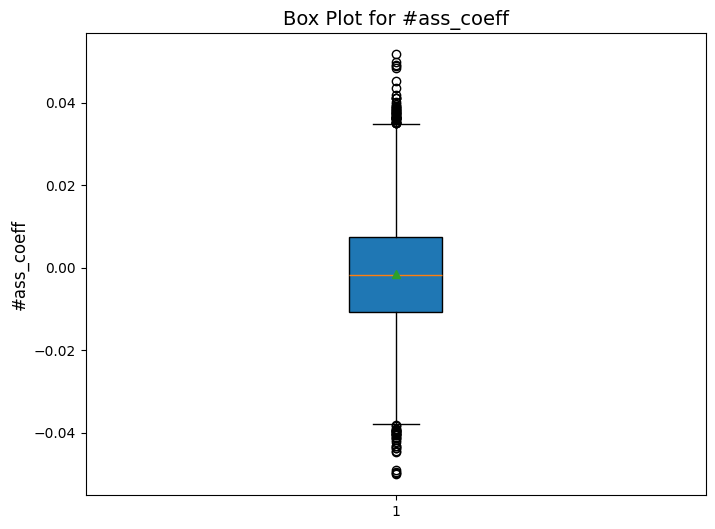

In [19]:
# Finding outliers

# Dados
n = 5000
dim, alpha_a, alpha_g = 1, 3.0, 2.0
path_file = f"../../data_2/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
df = pd.read_csv(path_file, sep=' ')

# Coluna que estamos analisando
column = "#ass_coeff"

# Calcular Q1, Q3 e IQR
q1 = np.percentile(df[column], 25)
q3 = np.percentile(df[column], 75)
iqr = q3 - q1

# Limites para outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identificar outliers
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

df_wo_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Exibir outliers
print("Outliers encontrados:")
print(outliers)

# Plotar o box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df[column], vert=True, patch_artist=True, showmeans=True)
plt.title(f"Box Plot for {column}", fontsize=14)
plt.ylabel(column, fontsize=12)
plt.show()

R_size: 1153
R_in_size: 789
R_out_size: 364
R_ratio: 2.1675824175824174
R_err: 23.727713102593572
R_mean_before: -0.0016422982558542932
R_mean_after: -0.0020463930152091257
R_err_int: 12.173829768026762


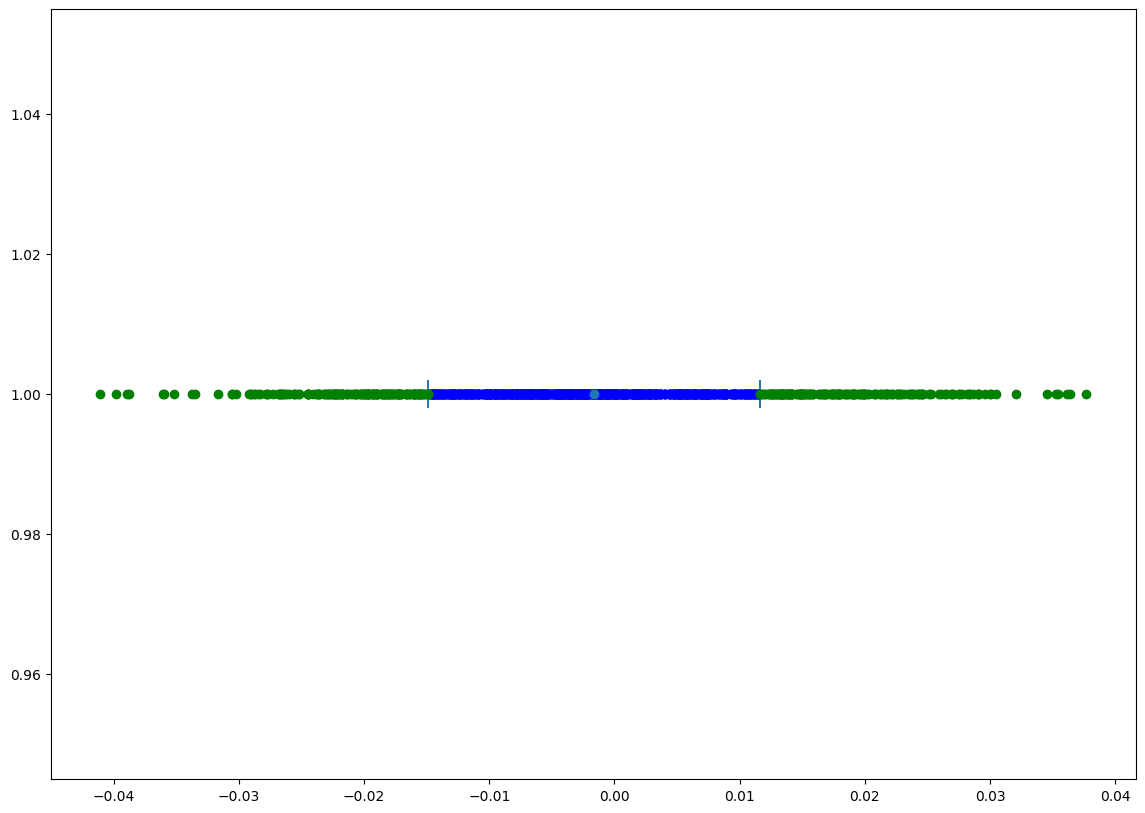

In [15]:
n = 5000
dim, alpha_a, alpha_g = 1, 3.0, 2.0
path_file = f"../../data/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
df = pd.read_csv(path_file, sep=',')
R = df["#ass_coeff"]
r_mean, r_std, r_err = R.mean(), R.std(), R.sem()
fig, ax = plt.subplots(figsize=(14, 10))

ax.errorbar(r_mean,1,xerr=r_std,marker='o',lw=1.4, capsize=10, capthick=1.4)
R_in = [i for i in R if abs(i-r_mean) <= r_std]
R_out = [i for i in R if abs(i-r_mean) > r_std]

ax.plot(R_in,np.ones(len(R_in)),'o', color='blue')
ax.plot(R_out,np.ones(len(R_out)),'o', color='green')
#ax.plot(R,np.ones(len(R)),'o')
#ax.set_xlim([r_mean - r_err, r_mean + r_err])

std_in = np.std(np.array(R_in), ddof=1)

R_in_err = std_in / np.sqrt(len(R_in))

print("R_size:",len(R))
print("R_in_size:",len(R_in))
print("R_out_size:",len(R_out))
print("R_ratio:",len(R_in)/len(R_out))
print("R_err:", (r_err/abs(r_mean))*100)
print("R_mean_before:", r_mean)
print("R_mean_after:", np.mean(np.array(R_in)))
print("R_err_int:", (R_in_err) / abs(np.mean(R_in))*100 )
plt.show()


In [41]:
def all_properties_file2(N, dim, alpha_a, alpha_g):
    # Diretório onde os arquivos estão localizados
    path_d = f"../../data_2/N_{N}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/prop"
    path_save = f"../../data_2/N_{N}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}"
    print(f"N = {N}, dim = {dim}, alpha_a = {alpha_a}, alpha_g = {alpha_g}")
    
    # Arquivos a serem atualizados
    properties_file = os.path.join(path_save, "properties_set.txt")
    filenames_file = os.path.join(path_save, "filenames.txt")
    
    # Verificar se o diretório 'prop' existe
    if not os.path.exists(path_d):
        print(f"O diretório {path_d} não existe. Nada a ser feito.")
        return
    
    # Obter todos os arquivos CSV na pasta prop
    all_files = glob.glob(os.path.join(path_d, "*.csv"))
    
    # Se não houver arquivos na pasta prop, nada é feito
    if not all_files:
        print(f"A pasta {path_d} está vazia. Nada a ser feito.")
        return
    
    # Checar se o arquivo filenames.txt existe, caso contrário criar um
    if os.path.exists(filenames_file):
        with open(filenames_file, 'r') as f:
            filenames_set = set(f.read().splitlines())  # Ler todos os arquivos já processados
    else:
        filenames_set = set()
    
    # Se o arquivo properties_set.txt existir, carregar o dataframe, caso contrário criar um novo
    if os.path.exists(properties_file):
        df = pd.read_csv(properties_file, sep=',')
    else:
        df = pd.DataFrame(columns=["#short_path", "#diamater", "#ass_coeff"])
    
    # Variável para rastrear se houve atualizações
    updated = False
    new_rows = []  # Armazenar novas linhas para adicionar ao dataframe
    
    # Iterar sobre todos os arquivos CSV e verificar se já foram processados
    for file in all_files:
        filename = os.path.basename(file)
        
        # Se o arquivo já foi processado, ignorar
        if filename in filenames_set:
            continue
        
        # Se o arquivo ainda não foi processado, ler os dados e adicionar ao DataFrame
        new_data = pd.read_csv(file)
        new_row = {
            "#short_path": new_data["#mean shortest path"].values[0],
            "#diamater": new_data["# diamater"].values[0],
            "#ass_coeff": new_data["#assortativity coefficient"].values[0]
        }
        new_rows.append(new_row)
        
        # Adicionar o nome do arquivo ao conjunto de arquivos processados
        filenames_set.add(filename)
        updated = True  # Indicar que houve atualizações
        #os.remove(file)  # Opcional: remover o arquivo após processamento
    
    # Se houver atualizações, salvar os arquivos atualizados
    if updated:
        # Adicionar as novas linhas ao dataframe
        df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)
        
        # Salvar o dataframe atualizado
        df.to_csv(properties_file, sep=' ', index=False)
        
        # Atualizar o arquivo filenames.txt
        with open(filenames_file, 'w') as f:
            f.write("\n".join(sorted(filenames_set)))  # Escrever os nomes dos arquivos processados
        
        print(f"Arquivos {properties_file} e {filenames_file} atualizados com sucesso.")
    else:
        print("Nenhuma atualização necessária. Todos os arquivos já estavam processados.")

In [42]:
df_N5 = filtered_df[filtered_df["N"]==5000]
df_N5

,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
4,5000.0,1.0,3.0,2.0,1153.0,0.213912,0.984802,23.727713,0.013232,0.308754,3.442902
12,5000.0,2.0,7.0,2.0,1153.0,0.154865,0.711644,11.024337,0.014119,0.238706,2.623905
21,5000.0,2.0,8.0,2.0,1153.0,0.150114,0.700082,17.066217,0.013941,0.221468,2.466709
30,5000.0,2.0,10.0,2.0,101.0,0.551155,0.782757,12.275713,0.014905,0.823446,2.784184
34,5000.0,3.0,10.0,2.0,101.0,0.562753,0.731943,32.790396,0.015425,0.747770,2.320720
40,5000.0,4.0,10.0,2.0,101.0,0.579262,0.713678,11.285406,0.015007,0.773410,2.291785
54,5000.0,4.0,12.0,2.0,101.0,0.516146,0.645946,55.024311,0.014417,0.766846,2.318116
55,5000.0,3.0,12.0,2.0,101.0,0.460558,0.613462,209.370192,0.015424,0.712484,2.236732
62,5000.0,4.0,13.0,2.0,10001.0,0.057561,0.731316,516.411984,0.015080,0.078606,2.384753
66,5000.0,4.0,14.0,2.0,101.0,0.562702,0.722749,66.762326,0.014560,0.818337,2.503898


In [29]:
all_properties_file2(5000, 1, 3.0, 2.0)

N = 5000, dim = 1, alpha_a = 3.0, alpha_g = 2.0
Arquivos ../../data_2/N_5000/dim_1/alpha_a_3.0_alpha_g_2.0/properties_set.txt e ../../data_2/N_5000/dim_1/alpha_a_3.0_alpha_g_2.0/filenames.txt atualizados com sucesso.


/tmp/ipykernel_157070/1789244718.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)


In [43]:
for _, row in df_N5.iterrows():
    all_properties_file2(5000, int(row["dim"]), row["alpha_a"], row["alpha_g"])


N = 5000, dim = 1, alpha_a = 3.0, alpha_g = 2.0


/tmp/ipykernel_157070/3239913424.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)


Arquivos ../../data_2/N_5000/dim_1/alpha_a_3.0_alpha_g_2.0/properties_set.txt e ../../data_2/N_5000/dim_1/alpha_a_3.0_alpha_g_2.0/filenames.txt atualizados com sucesso.
N = 5000, dim = 2, alpha_a = 7.0, alpha_g = 2.0


/tmp/ipykernel_157070/3239913424.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)


Arquivos ../../data_2/N_5000/dim_2/alpha_a_7.0_alpha_g_2.0/properties_set.txt e ../../data_2/N_5000/dim_2/alpha_a_7.0_alpha_g_2.0/filenames.txt atualizados com sucesso.
N = 5000, dim = 2, alpha_a = 8.0, alpha_g = 2.0


/tmp/ipykernel_157070/3239913424.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)


Arquivos ../../data_2/N_5000/dim_2/alpha_a_8.0_alpha_g_2.0/properties_set.txt e ../../data_2/N_5000/dim_2/alpha_a_8.0_alpha_g_2.0/filenames.txt atualizados com sucesso.
N = 5000, dim = 2, alpha_a = 10.0, alpha_g = 2.0


/tmp/ipykernel_157070/3239913424.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)


Arquivos ../../data_2/N_5000/dim_2/alpha_a_10.0_alpha_g_2.0/properties_set.txt e ../../data_2/N_5000/dim_2/alpha_a_10.0_alpha_g_2.0/filenames.txt atualizados com sucesso.
N = 5000, dim = 3, alpha_a = 10.0, alpha_g = 2.0


/tmp/ipykernel_157070/3239913424.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)


Arquivos ../../data_2/N_5000/dim_3/alpha_a_10.0_alpha_g_2.0/properties_set.txt e ../../data_2/N_5000/dim_3/alpha_a_10.0_alpha_g_2.0/filenames.txt atualizados com sucesso.
N = 5000, dim = 4, alpha_a = 10.0, alpha_g = 2.0


/tmp/ipykernel_157070/3239913424.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)


Arquivos ../../data_2/N_5000/dim_4/alpha_a_10.0_alpha_g_2.0/properties_set.txt e ../../data_2/N_5000/dim_4/alpha_a_10.0_alpha_g_2.0/filenames.txt atualizados com sucesso.
N = 5000, dim = 4, alpha_a = 12.0, alpha_g = 2.0


/tmp/ipykernel_157070/3239913424.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)


Arquivos ../../data_2/N_5000/dim_4/alpha_a_12.0_alpha_g_2.0/properties_set.txt e ../../data_2/N_5000/dim_4/alpha_a_12.0_alpha_g_2.0/filenames.txt atualizados com sucesso.
N = 5000, dim = 3, alpha_a = 12.0, alpha_g = 2.0


/tmp/ipykernel_157070/3239913424.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)


Arquivos ../../data_2/N_5000/dim_3/alpha_a_12.0_alpha_g_2.0/properties_set.txt e ../../data_2/N_5000/dim_3/alpha_a_12.0_alpha_g_2.0/filenames.txt atualizados com sucesso.
N = 5000, dim = 4, alpha_a = 13.0, alpha_g = 2.0


/tmp/ipykernel_157070/3239913424.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)


Arquivos ../../data_2/N_5000/dim_4/alpha_a_13.0_alpha_g_2.0/properties_set.txt e ../../data_2/N_5000/dim_4/alpha_a_13.0_alpha_g_2.0/filenames.txt atualizados com sucesso.
N = 5000, dim = 4, alpha_a = 14.0, alpha_g = 2.0


/tmp/ipykernel_157070/3239913424.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)


Arquivos ../../data_2/N_5000/dim_4/alpha_a_14.0_alpha_g_2.0/properties_set.txt e ../../data_2/N_5000/dim_4/alpha_a_14.0_alpha_g_2.0/filenames.txt atualizados com sucesso.
N = 5000, dim = 3, alpha_a = 14.0, alpha_g = 2.0


/tmp/ipykernel_157070/3239913424.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)


Arquivos ../../data_2/N_5000/dim_3/alpha_a_14.0_alpha_g_2.0/properties_set.txt e ../../data_2/N_5000/dim_3/alpha_a_14.0_alpha_g_2.0/filenames.txt atualizados com sucesso.
N = 5000, dim = 3, alpha_a = 15.0, alpha_g = 2.0


/tmp/ipykernel_157070/3239913424.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)


Arquivos ../../data_2/N_5000/dim_3/alpha_a_15.0_alpha_g_2.0/properties_set.txt e ../../data_2/N_5000/dim_3/alpha_a_15.0_alpha_g_2.0/filenames.txt atualizados com sucesso.
N = 5000, dim = 4, alpha_a = 15.0, alpha_g = 2.0
Arquivos ../../data_2/N_5000/dim_4/alpha_a_15.0_alpha_g_2.0/properties_set.txt e ../../data_2/N_5000/dim_4/alpha_a_15.0_alpha_g_2.0/filenames.txt atualizados com sucesso.


/tmp/ipykernel_157070/3239913424.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)


Outliers encontrados:
       #short_path  #diamater  #ass_coeff
476        12.1098         28    0.047811
504        12.2835         31    0.061345
859        13.8785         33   -0.046842
1300       12.1718         28    0.046267
1540       14.2485         33   -0.049995
2155       14.1249         31   -0.046061
2432       12.7665         33    0.045167
2543       14.7851         37   -0.060061
2561       12.3020         33    0.047017
2576       12.3777         31    0.044187
2762       12.9589         31    0.049625
2922       12.8587         29   -0.047136
4232       11.6062         27    0.043915
4453       12.8684         28   -0.045858
4497       12.2773         28    0.047501
5468       12.5487         27    0.043510
6197       12.7738         31    0.050556
6853       12.6346         30    0.044748
6876       13.7583         30   -0.051224
7944       12.2500         31    0.047549
8196       12.1935         29    0.045803
8313       13.2572         30    0.045095
8346       1

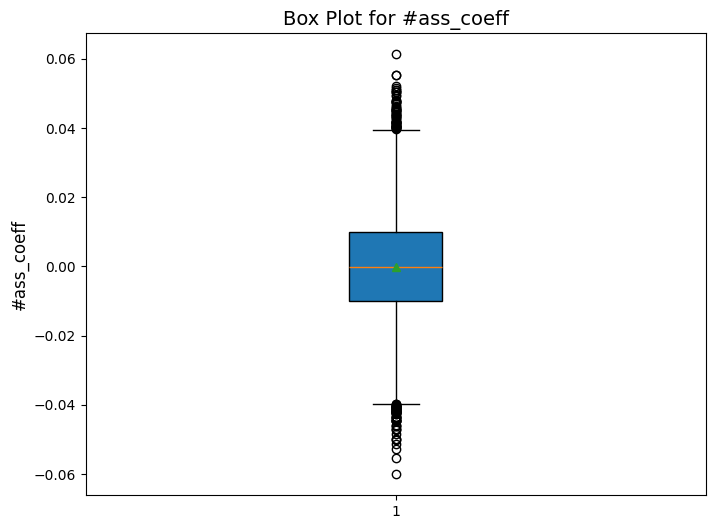

err_out = 779.8164978447649, err_wout = 159.03096339983006, size_outs = 50
Outliers encontrados:
       #short_path  #diamater  #ass_coeff
619        13.4786         33   -0.050121
720        12.0131         29    0.050974
1360       11.3901         29    0.050227
1369       16.8628         37   -0.060422
2387       13.2513         29   -0.047520
2500       11.9111         27    0.045451
2886       11.6802         26    0.049399
3225       11.5638         28    0.047242
3615       13.6610         32   -0.054141
4273       11.3450         26    0.048075
4991       11.6336         29    0.047343
5248       13.4238         34   -0.051347
6305       11.8887         28    0.045256
6578       12.7951         32   -0.049540
6968       11.6403         28    0.046416
7032       12.5100         30   -0.050309
8291       11.8102         28    0.052253
8377       12.3556         30    0.045601
9371       12.7452         30   -0.047592
9506       14.3215         32   -0.049049
9735       14.5585   

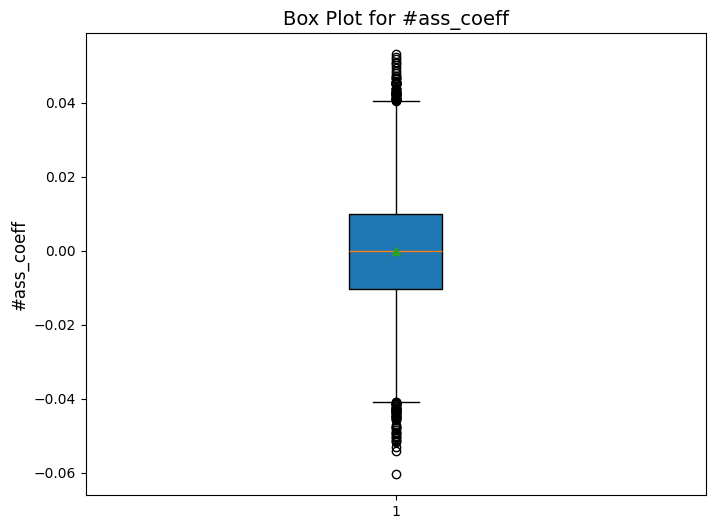

err_out = 54.756897110228394, err_wout = 49.90381927614633, size_outs = 44


In [75]:
for _, row in df_N5.iterrows():
    dim = int(row["dim"])
    alpha_a, alpha_g = row["alpha_a"], row["alpha_g"]
    path_file = f"../../data_2/N_{5000}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
    df = pd.read_csv(path_file, sep=' ')
    R = df["#ass_coeff"]
    R_per = (R.sem()/abs(R.mean()))*100
    
    if(R_per > 10):
        # Finding outliers
        # Calcular Q1, Q3 e IQR
        q1 = np.percentile(df["#ass_coeff"], 20)
        q3 = np.percentile(df["#ass_coeff"], 75)
        iqr = q3 - q1

        # Limites para outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Identificar outliers
        outliers = df[(df["#ass_coeff"] < lower_bound) | (df["#ass_coeff"] > upper_bound)]

        df_wo_out = df[(df["#ass_coeff"] >= lower_bound) & (df["#ass_coeff"] <= upper_bound)]

        # Exibir outliers
        print("Outliers encontrados:")
        print(outliers)
        #print(len(outliers))

        # Plotar o box plot
        plt.figure(figsize=(8, 6))
        plt.boxplot(df["#ass_coeff"], vert=True, patch_artist=True, showmeans=True)
        plt.title(f"Box Plot for #ass_coeff", fontsize=14)
        plt.ylabel("#ass_coeff", fontsize=12)
        plt.show()
        df_clean = df.merge(outliers, how='outer', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
        R_per_wo = (df_clean["#ass_coeff"].sem()/abs(df_clean["#ass_coeff"].mean()))*100
        print(f"err_out = {R_per}, err_wout = {R_per_wo}, size_outs = {len(outliers)}")
    #all_properties_file2(5000, int(row["dim"]), row["alpha_a"], row["alpha_g"])
    plt.show()

R_size: 20141
R_in_size: 13692
R_out_size: 6449
R_ratio: 2.1231198635447357
R_err: 6.404427120935368
R_mean_before: -0.0014939014097562187
R_mean_after: -0.0015928231079389422
R_err_after: 3.946055432116724


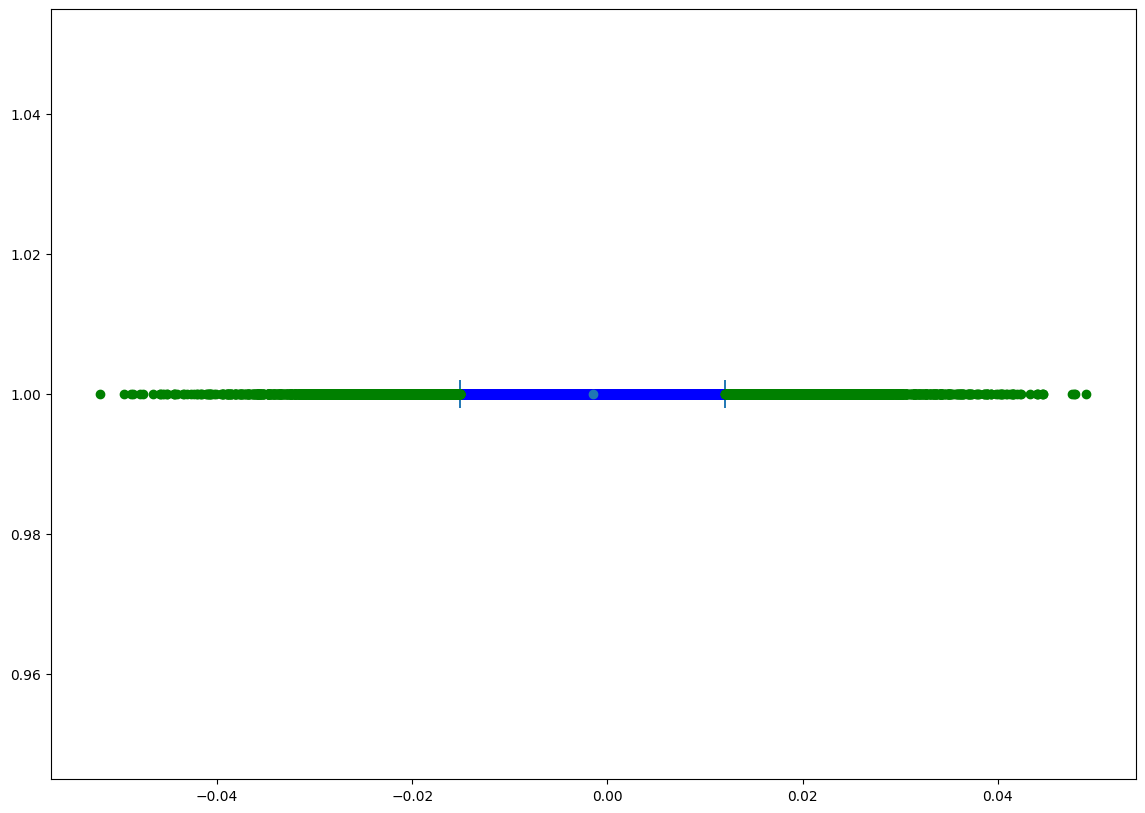

In [44]:
n = 5000
dim = 1
alpha_a, alpha_g = 3.0, 2.0
path_file = f"../../data_2/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
df = pd.read_csv(path_file, sep=' ')
R = df["#ass_coeff"]
r_mean, r_std, r_err = R.mean(), R.std(), R.sem()
fig, ax = plt.subplots(figsize=(14, 10))

ax.errorbar(r_mean,1,xerr=r_std,marker='o',lw=1.4, capsize=10, capthick=1.4)
R_in = [i for i in R if abs(i-r_mean) <= r_std]
R_out = [i for i in R if abs(i-r_mean) > r_std]

ax.plot(R_in,np.ones(len(R_in)),'o', color='blue')
ax.plot(R_out,np.ones(len(R_out)),'o', color='green')
#ax.plot(R,np.ones(len(R)),'o')
#ax.set_xlim([r_mean - r_err, r_mean + r_err])

std_in = np.std(np.array(R_in), ddof=1)

R_in_err = std_in / np.sqrt(len(R_in))

print("R_size:",len(R))
print("R_in_size:",len(R_in))
print("R_out_size:",len(R_out))
print("R_ratio:",len(R_in)/len(R_out))
print("R_err:", (r_err/abs(r_mean))*100)
print("R_mean_before:", r_mean)
print("R_mean_after:", np.mean(np.array(R_in)))
print("R_err_after:", (R_in_err) / abs(np.mean(R_in))*100 )
plt.show()

       #short_path  #diamater  #ass_coeff
0          15.1767         36   -0.014560
1          13.1928         30    0.009864
2          12.4850         30    0.016158
3          14.9971         34   -0.025093
4          13.3159         32    0.002096
...            ...        ...         ...
20135      12.8098         30    0.001092
20136      13.0967         29    0.008506
20137      12.7827         30    0.012786
20138      14.6328         33   -0.030901
20139      13.1931         33   -0.018372

[20140 rows x 3 columns]
N_samples: 20140
R_err = 2.943883464731498 %


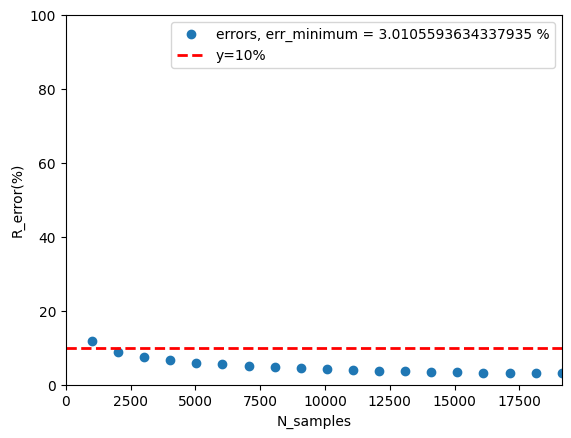

In [39]:
n, dim, alpha_a, alpha_g = 5000, 2, 7.0, 2.0
file_path = f"../../data_2/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
#df = pd.read_csv(path_file, sep=' ')
df = pd.read_csv(file_path, sep=',')
R = df["#ass_coeff"]
print(df)
num_samples = float(len(R))
num_points = 20
divisions = int(num_samples // num_points)
width = [(0,i*divisions) for i in range(1,num_points)]

R_err = []
R_mean = []
R_std = []
n_samples = []
C_V = []

for i in range(len(width)):
    R_err.append(R[0:width[i][1]].sem())
    R_mean.append(R[0:width[i][1]].mean())
    
    r_std = abs(R[0:width[i][1]].std())
    r_mean = abs(R[0:width[i][1]].mean())
    R_std.append(r_std)
    #print(r_std, r_mean)
    #C_V.append((/)*100)
    n_samples.append(len(R[0:width[i][1]]))

#print(R_std)
#print(R_mean)
#print(R_err)
print("N_samples:", len(R))
print(f"R_err = {abs(R.sem()/R.mean())*100} %" )
percent = [abs(i/j)*100 for i,j in zip(R_err, R_mean)]
#print([i/j for i,j in zip(R_err, R_mean)])
#plt.plot(n_samples, R_err,'o', label='errors')
plt.plot(n_samples, percent,'o', label=f'errors, err_minimum = {min(percent)} %')
plt.axhline(y=10, color='red', linestyle='--', linewidth=2, label="y=10%")  # Linha horizontal
#plt.plot(n_samples, R_mean,'o', label='means')
#plt.plot(n_samples, C_V,'o', label='means')
#plt.axhline(y=np.mean(np.array(C_V)), xmin=min(n_samples),xmax=max(n_samples))
plt.ylabel("R_error(%)")
plt.xlabel("N_samples")
plt.ylim([0, 100])
plt.xlim([0, width[-1][1]])
plt.legend()
#plt.xscale("log")
#plt.savefig("CV_n_samples.pdf")
plt.show()

/tmp/ipykernel_50407/3323762311.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True)


N_samples: 372
R_err = 25.393170592666742 %


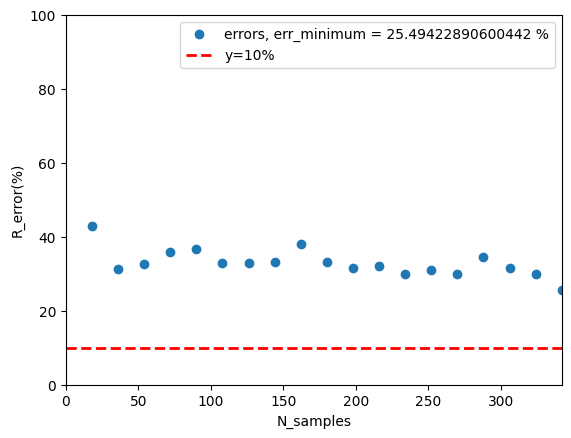

In [8]:
n, dim, alpha_a, alpha_g = 40000, 4, 10.0, 2.0
file_path = f"../../data_2/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
#df = pd.read_csv(path_file, sep=' ')
df = pd.read_csv(file_path, delim_whitespace=True)
R = df["#ass_coeff"]

num_samples = float(len(R))
num_points = 20
divisions = int(num_samples // num_points)
width = [(0,i*divisions) for i in range(1,num_points)]

R_err = []
R_mean = []
R_std = []
n_samples = []
C_V = []

for i in range(len(width)):
    R_err.append(R[0:width[i][1]].sem())
    R_mean.append(R[0:width[i][1]].mean())
    
    r_std = abs(R[0:width[i][1]].std())
    r_mean = abs(R[0:width[i][1]].mean())
    R_std.append(r_std)
    #print(r_std, r_mean)
    #C_V.append((/)*100)
    n_samples.append(len(R[0:width[i][1]]))

#print(R_std)
#print(R_mean)
#print(R_err)
print("N_samples:", len(R))
print(f"R_err = {abs(R.sem()/R.mean())*100} %" )
percent = [abs(i/j)*100 for i,j in zip(R_err, R_mean)]
#print([i/j for i,j in zip(R_err, R_mean)])
#plt.plot(n_samples, R_err,'o', label='errors')
plt.plot(n_samples, percent,'o', label=f'errors, err_minimum = {min(percent)} %')
plt.axhline(y=10, color='red', linestyle='--', linewidth=2, label="y=10%")  # Linha horizontal
#plt.plot(n_samples, R_mean,'o', label='means')
#plt.plot(n_samples, C_V,'o', label='means')
#plt.axhline(y=np.mean(np.array(C_V)), xmin=min(n_samples),xmax=max(n_samples))
plt.ylabel("R_error(%)")
plt.xlabel("N_samples")
plt.ylim([0, 100])
plt.xlim([0, width[-1][1]])
plt.legend()
#plt.xscale("log")
#plt.savefig("CV_n_samples.pdf")
plt.show()

    #short_path  #diamater  #ass_coeff
0       15.6232         37    0.006160
1       15.9187         39   -0.001484
2       15.7192         37   -0.005631
3       15.9986         39   -0.000377
4       16.6875         39    0.005443
..          ...        ...         ...
87      15.5904         38    0.005358
88      14.7551         35    0.004907
89      15.9872         39    0.003199
90      15.3449         35   -0.004852
91      16.7397         43   -0.002344

[92 rows x 3 columns]
N_samples: 92
R_err = 4641.171435368518 %


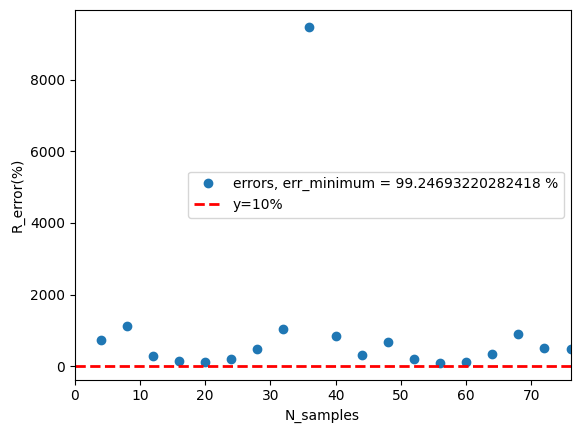

In [7]:
n, dim, alpha_a, alpha_g = 40000, 4, 10.0, 2.0
file_path = f"../../data/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
#df = pd.read_csv(path_file, sep=' ')
df = pd.read_csv(file_path, sep=',')
R = df["#ass_coeff"]
print(df)
num_samples = float(len(R))
num_points = 20
divisions = int(num_samples // num_points)
width = [(0,i*divisions) for i in range(1,num_points)]

R_err = []
R_mean = []
R_std = []
n_samples = []
C_V = []

for i in range(len(width)):
    R_err.append(R[0:width[i][1]].sem())
    R_mean.append(R[0:width[i][1]].mean())
    
    r_std = abs(R[0:width[i][1]].std())
    r_mean = abs(R[0:width[i][1]].mean())
    R_std.append(r_std)
    #print(r_std, r_mean)
    #C_V.append((/)*100)
    n_samples.append(len(R[0:width[i][1]]))

#print(R_std)
#print(R_mean)
#print(R_err)
print("N_samples:", len(R))
print(f"R_err = {abs(R.sem()/R.mean())*100} %" )
percent = [abs(i/j)*100 for i,j in zip(R_err, R_mean)]
#print([i/j for i,j in zip(R_err, R_mean)])
#plt.plot(n_samples, R_err,'o', label='errors')
plt.plot(n_samples, percent,'o', label=f'errors, err_minimum = {min(percent)} %')
plt.axhline(y=10, color='red', linestyle='--', linewidth=2, label="y=10%")  # Linha horizontal
#plt.plot(n_samples, R_mean,'o', label='means')
#plt.plot(n_samples, C_V,'o', label='means')
#plt.axhline(y=np.mean(np.array(C_V)), xmin=min(n_samples),xmax=max(n_samples))
plt.ylabel("R_error(%)")
plt.xlabel("N_samples")
#plt.ylim([0, 100])
plt.xlim([0, width[-1][1]])
plt.legend()
#plt.xscale("log")
#plt.savefig("CV_n_samples.pdf")
plt.show()

R_size: 51
σ: 0.011195653034690932
R_mean: 0.04047569607843137
R_in_size: 37
R_out_size: 14
R_ratio: 2.642857142857143
R_err: 3.873200831873877
R_mean_in: 0.040850889189189186
R_err_int: 2.6184743850147605


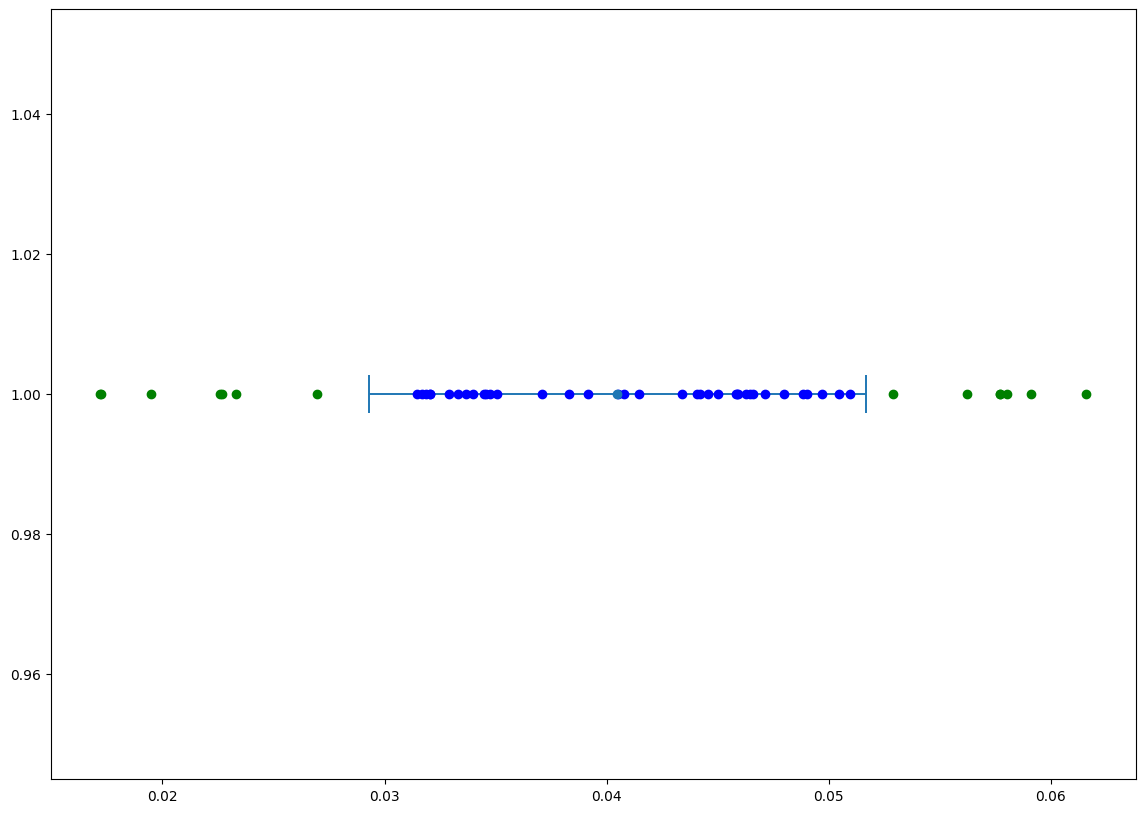

In [25]:
n = 5000
dim, alpha_a, alpha_g = 1, 8.0, 3.0
path_file = f"../../data/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
df = pd.read_csv(path_file, sep=',')
R = df["#ass_coeff"]

r_mean, r_std, r_err = R.mean(), R.std(), R.sem()
fig, ax = plt.subplots(figsize=(14, 10))

ax.errorbar(r_mean,1,xerr=r_std,marker='o',lw=1.4, capsize=14 ,capthick=1.4)

R_in = [i for i in R if abs(i-r_mean) <= r_std]
R_out = [i for i in R if abs(i-r_mean) > r_std]

ax.plot(R_in,np.ones(len(R_in)),'o', color='blue')
ax.plot(R_out,np.ones(len(R_out)),'o', color='green')

std_in = np.std(np.array(R_in), ddof=1)

R_in_err = std_in / np.sqrt(len(R_in))

print("R_size:",len(R))
print("σ:", r_std)
print("R_mean:", r_mean)
print("R_in_size:",len(R_in))
print("R_out_size:",len(R_out))
print("R_ratio:",len(R_in)/len(R_out))
print("R_err:", (r_err/abs(r_mean))*100)
print("R_mean_in:", np.mean(np.array(R_in)))

print("R_err_int:", (R_in_err) / abs(np.mean(R_in))*100 )
#ax.set_xlim([r_mean - r_err, r_mean + r_err])
plt.show()

In [26]:
filtered_df

,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,320000.0,4.0,0.0,2.0,7.0,1.090394,0.368028,10.231336,0.004835,0.816340,0.786796
1,160000.0,4.0,1.0,2.0,12.0,1.872601,0.751579,11.744720,0.010087,1.443839,1.621354
2,320000.0,3.0,1.0,2.0,7.0,1.500937,0.486508,17.693658,0.010579,2.294106,2.115701
3,5000.0,1.0,3.0,2.0,1153.0,0.213912,0.984802,23.727713,0.013232,0.308754,3.442902
4,320000.0,4.0,3.0,2.0,7.0,2.821308,0.918413,16.063719,0.013894,3.125044,2.870208
...,...,...,...,...,...,...,...,...,...,...,...
69,10000.0,4.0,14.0,2.0,51.0,0.702636,0.708174,22.767787,0.009675,0.968682,2.333053
70,10000.0,4.0,15.0,2.0,51.0,0.652443,0.654341,29.312199,0.013299,0.955789,2.319398
71,10000.0,3.0,15.0,2.0,51.0,0.604741,0.647900,19.773953,0.012639,1.057979,2.648862
72,5000.0,3.0,15.0,2.0,101.0,0.581701,0.792137,17.939215,0.013582,0.832939,2.689473


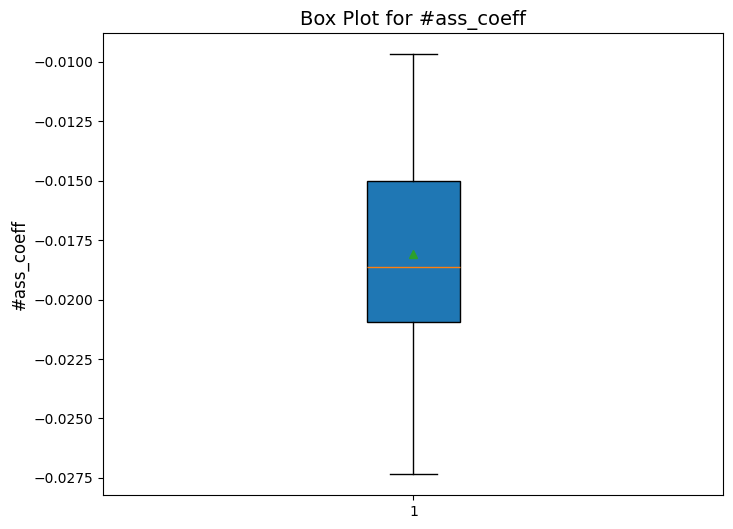

In [27]:
# box_plot
n=320000
dim = 1
alpha_a, alpha_g = 0.0, 2.0
path_file = f"../../data/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
a = pd.read_csv(path_file, sep=',')

plt.figure(figsize=(8, 6))
plt.boxplot(a["#ass_coeff"], vert=True, patch_artist=True, showmeans=True)
plt.title("Box Plot for #ass_coeff", fontsize=14)
plt.ylabel("#ass_coeff", fontsize=12)
plt.show()

In [28]:
filtered_df[filtered_df["N"]==320000]

,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,320000.0,4.0,0.0,2.0,7.0,1.090394,0.368028,10.231336,0.004835,0.816340,0.786796
2,320000.0,3.0,1.0,2.0,7.0,1.500937,0.486508,17.693658,0.010579,2.294106,2.115701
4,320000.0,4.0,3.0,2.0,7.0,2.821308,0.918413,16.063719,0.013894,3.125044,2.870208
6,320000.0,2.0,5.0,2.0,7.0,1.009802,0.533346,19.768038,0.002123,1.245705,1.676163
10,320000.0,3.0,6.0,2.0,7.0,2.266597,1.107668,15.536231,0.004087,1.598755,1.951800
13,320000.0,3.0,7.0,2.0,24.0,0.728681,0.685694,29.421829,0.002838,0.929982,2.145099
16,320000.0,3.0,8.0,2.0,24.0,0.605613,0.584853,27.449370,0.002738,1.119827,2.697288
22,320000.0,4.0,8.0,2.0,9.0,1.634044,0.887598,16.226056,0.003210,2.618745,3.640055
23,320000.0,4.0,9.0,2.0,23.0,0.740318,0.660922,16.529770,0.003231,1.052438,2.359071
29,320000.0,3.0,9.0,2.0,7.0,1.613732,0.852971,13.506019,0.002620,2.766193,3.638419
